### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8


2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Data Cleaning

Use the prompts below to get started with your data analysis.

#### 1. Read in the `coupons.csv` file.




In [2]:
def trimurl(u):
  url1=u[:u.index('/view')]
  url2 = url1.replace(url1[url1.index('file/d/'):url1.index('file/d/')+7],'uc?export=download&id=')
  return url2
rawdata = pd.read_csv(trimurl('https://drive.google.com/file/d/11p2XPYbpA_zLBzse6FoOi5sXcBox4NYb/view?usp=sharing'))
data=rawdata

In [3]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11588,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,36,Unmarried partner,...,4~8,4~8,less1,less1,1,0,0,1,0,1
5675,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,21,Single,...,1~3,gt8,4~8,never,1,0,0,0,1,0
8891,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,26,Unmarried partner,...,less1,4~8,1~3,less1,1,1,0,0,1,1
12628,Home,Partner,Sunny,30,10PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,1,0,0
1635,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,26,Married partner,...,4~8,1~3,4~8,less1,1,1,0,0,1,0
1797,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Male,36,Unmarried partner,...,less1,4~8,1~3,less1,1,0,0,0,1,1
7755,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Male,21,Unmarried partner,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
6989,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,36,Married partner,...,never,1~3,4~8,never,1,1,0,0,1,0
4264,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,0,0,1,1
3367,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,26,Single,...,never,4~8,1~3,never,1,1,0,0,1,1


#### 2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Cleanup `NA` and `NaN` values
**Comment:** Many variables with ```NA``` or ```NaN``` values. Need to view the unique outputs of each variable and group into appropriate outputs and datatypes for analysis

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
data['destination'].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [6]:
data=data.rename(columns={'passanger':'passenger'})
data['passenger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passenger, dtype: int64

In [7]:
data['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [8]:
data['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [9]:
data['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

**Comment:** Can convert time to 24-hour standard and make it a continuous `int` variable, making it easier to compare with other continuous variables.  Will rename the `time` variable as `hourofday`

In [10]:
data['time'][1][-2]

for x in range (0,len(data)):
  if data['time'][x][-2]=='P':
    data['time'][x]=int(data['time'][x][:-2])+12
  else:
    data['time'][x]=int(data['time'][x][:-2])

data=data.rename(columns={'time':'hourofday'})

<ipython-input-10-de8b9f1e4020>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'][x]=int(data['time'][x][:-2])+12
<ipython-input-10-de8b9f1e4020>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'][x]=int(data['time'][x][:-2])


In [11]:
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [12]:
data['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [13]:
data['gender'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

In [14]:
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

**Comment**: Want to use age as a continuous variable, so converting to `int`

In [15]:
data['age']=data['age'].replace('50plus','50').replace('below21','16')
data['age']=data['age'].astype(int)
data['age'].value_counts()

21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
16     547
Name: age, dtype: int64

In [16]:
data['maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [17]:
data['has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

In [18]:
data['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [19]:
data['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [20]:
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

Let's convert `income` to a continuous output to allow for easier visualization

In [21]:
inclist=list(data['income'].unique())

data['income']=data['income'].replace({'$25000 - $37499':'31250','$12500 - $24999':'18750','$37500 - $49999':'43750','$100000 or More':'112500','$50000 - $62499':'56250','Less than $12500':'6250','$87500 - $99999':'93750','$75000 - $87499':'81250','$62500 - $74999':'68750'}).astype('int')
data['income'].value_counts()

31250     2013
18750     1831
43750     1805
112500    1736
56250     1659
6250      1042
93750      895
81250      857
68750      846
Name: income, dtype: int64

In [22]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

**Assumption:** The prompt states that these are *driving* coupons, i.e. all participants in the survey are drivers of a vehicle. Less than 1% (108 / 12,684) of participants specified the type of car they drove. Therefore, this column of data has a low probability of impacting analysis outcome. Will remove from dataset.

In [23]:
data=data.drop('car',axis=1)

In [24]:
data['Bar'].value_counts()
#len(data['Bar'])

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

**Assumption:** `NA` or `NaN` values for `Bar`, `CoffeHouse`, `CarryAway`, `RestaurantLessThan20`, and `Restaurant20To50` columns mean `never`

In [25]:
couptypes=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
data[couptypes]=data[couptypes].fillna('never')

In [26]:
data['Bar'].value_counts()

never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [27]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    3179
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [28]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     304
Name: CarryAway, dtype: int64

In [29]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     350
Name: RestaurantLessThan20, dtype: int64

In [30]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2325
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [31]:
[data['toCoupon_GEQ5min'].value_counts(),data['toCoupon_GEQ15min'].value_counts(),data['toCoupon_GEQ25min'].value_counts()]

[1    12684
 Name: toCoupon_GEQ5min, dtype: int64,
 1    7122
 0    5562
 Name: toCoupon_GEQ15min, dtype: int64,
 0    11173
 1     1511
 Name: toCoupon_GEQ25min, dtype: int64]

**Comment:** Based on the data this information can be stored as a single column with one integer from the list: [5,15,25]

Will name this new column `ttc`... Time to Coupon

In [32]:
data['ttc']=5
for x in range(0,len(data)):
  if data['toCoupon_GEQ25min'][x]==1:
    data['ttc'][x]=25
  elif data['toCoupon_GEQ15min'][x]==1:
    data['ttc'][x]=15
  else:
    data['ttc'][x]=5

<ipython-input-32-2c9c19fd0767>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ttc'][x]=5
<ipython-input-32-2c9c19fd0767>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ttc'][x]=15
<ipython-input-32-2c9c19fd0767>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ttc'][x]=25


**Comment:** Remove `toCoupon` columns as they don't serve a purpose anymore in the dataset

In [33]:
data=data.drop(['toCoupon_GEQ25min','toCoupon_GEQ15min','toCoupon_GEQ5min'],axis=1)

In [34]:
data['direction_same'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

If `direction_same` and `direction_opp` are opposites, one should be removed from the dataframe because there's no purpose except future confusion

In [35]:
data['direction_same'].value_counts().max()==data['direction_opp'].value_counts().max()

True

In [36]:
data=data.drop('direction_opp',axis=1)

In [37]:
data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   hourofday             12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  int64 
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

Let's look at all variables and all possible values

In [39]:
values={}
for x in range(0,len(data.columns)):
  values[data.columns[x]]=list(data[''+data.columns[x]+''].unique())

values

{'destination': ['No Urgent Place', 'Home', 'Work'],
 'passenger': ['Alone', 'Friend(s)', 'Kid(s)', 'Partner'],
 'weather': ['Sunny', 'Rainy', 'Snowy'],
 'temperature': [55, 80, 30],
 'hourofday': [14, 10, 18, 7, 22],
 'coupon': ['Restaurant(<20)',
  'Coffee House',
  'Carry out & Take away',
  'Bar',
  'Restaurant(20-50)'],
 'expiration': ['1d', '2h'],
 'gender': ['Female', 'Male'],
 'age': [21, 46, 26, 31, 41, 50, 36, 16],
 'maritalStatus': ['Unmarried partner',
  'Single',
  'Married partner',
  'Divorced',
  'Widowed'],
 'has_children': [1, 0],
 'education': ['Some college - no degree',
  'Bachelors degree',
  'Associates degree',
  'High School Graduate',
  'Graduate degree (Masters or Doctorate)',
  'Some High School'],
 'occupation': ['Unemployed',
  'Architecture & Engineering',
  'Student',
  'Education&Training&Library',
  'Healthcare Support',
  'Healthcare Practitioners & Technical',
  'Sales & Related',
  'Management',
  'Arts Design Entertainment Sports & Media',
  'Compu

#### Check for outliers

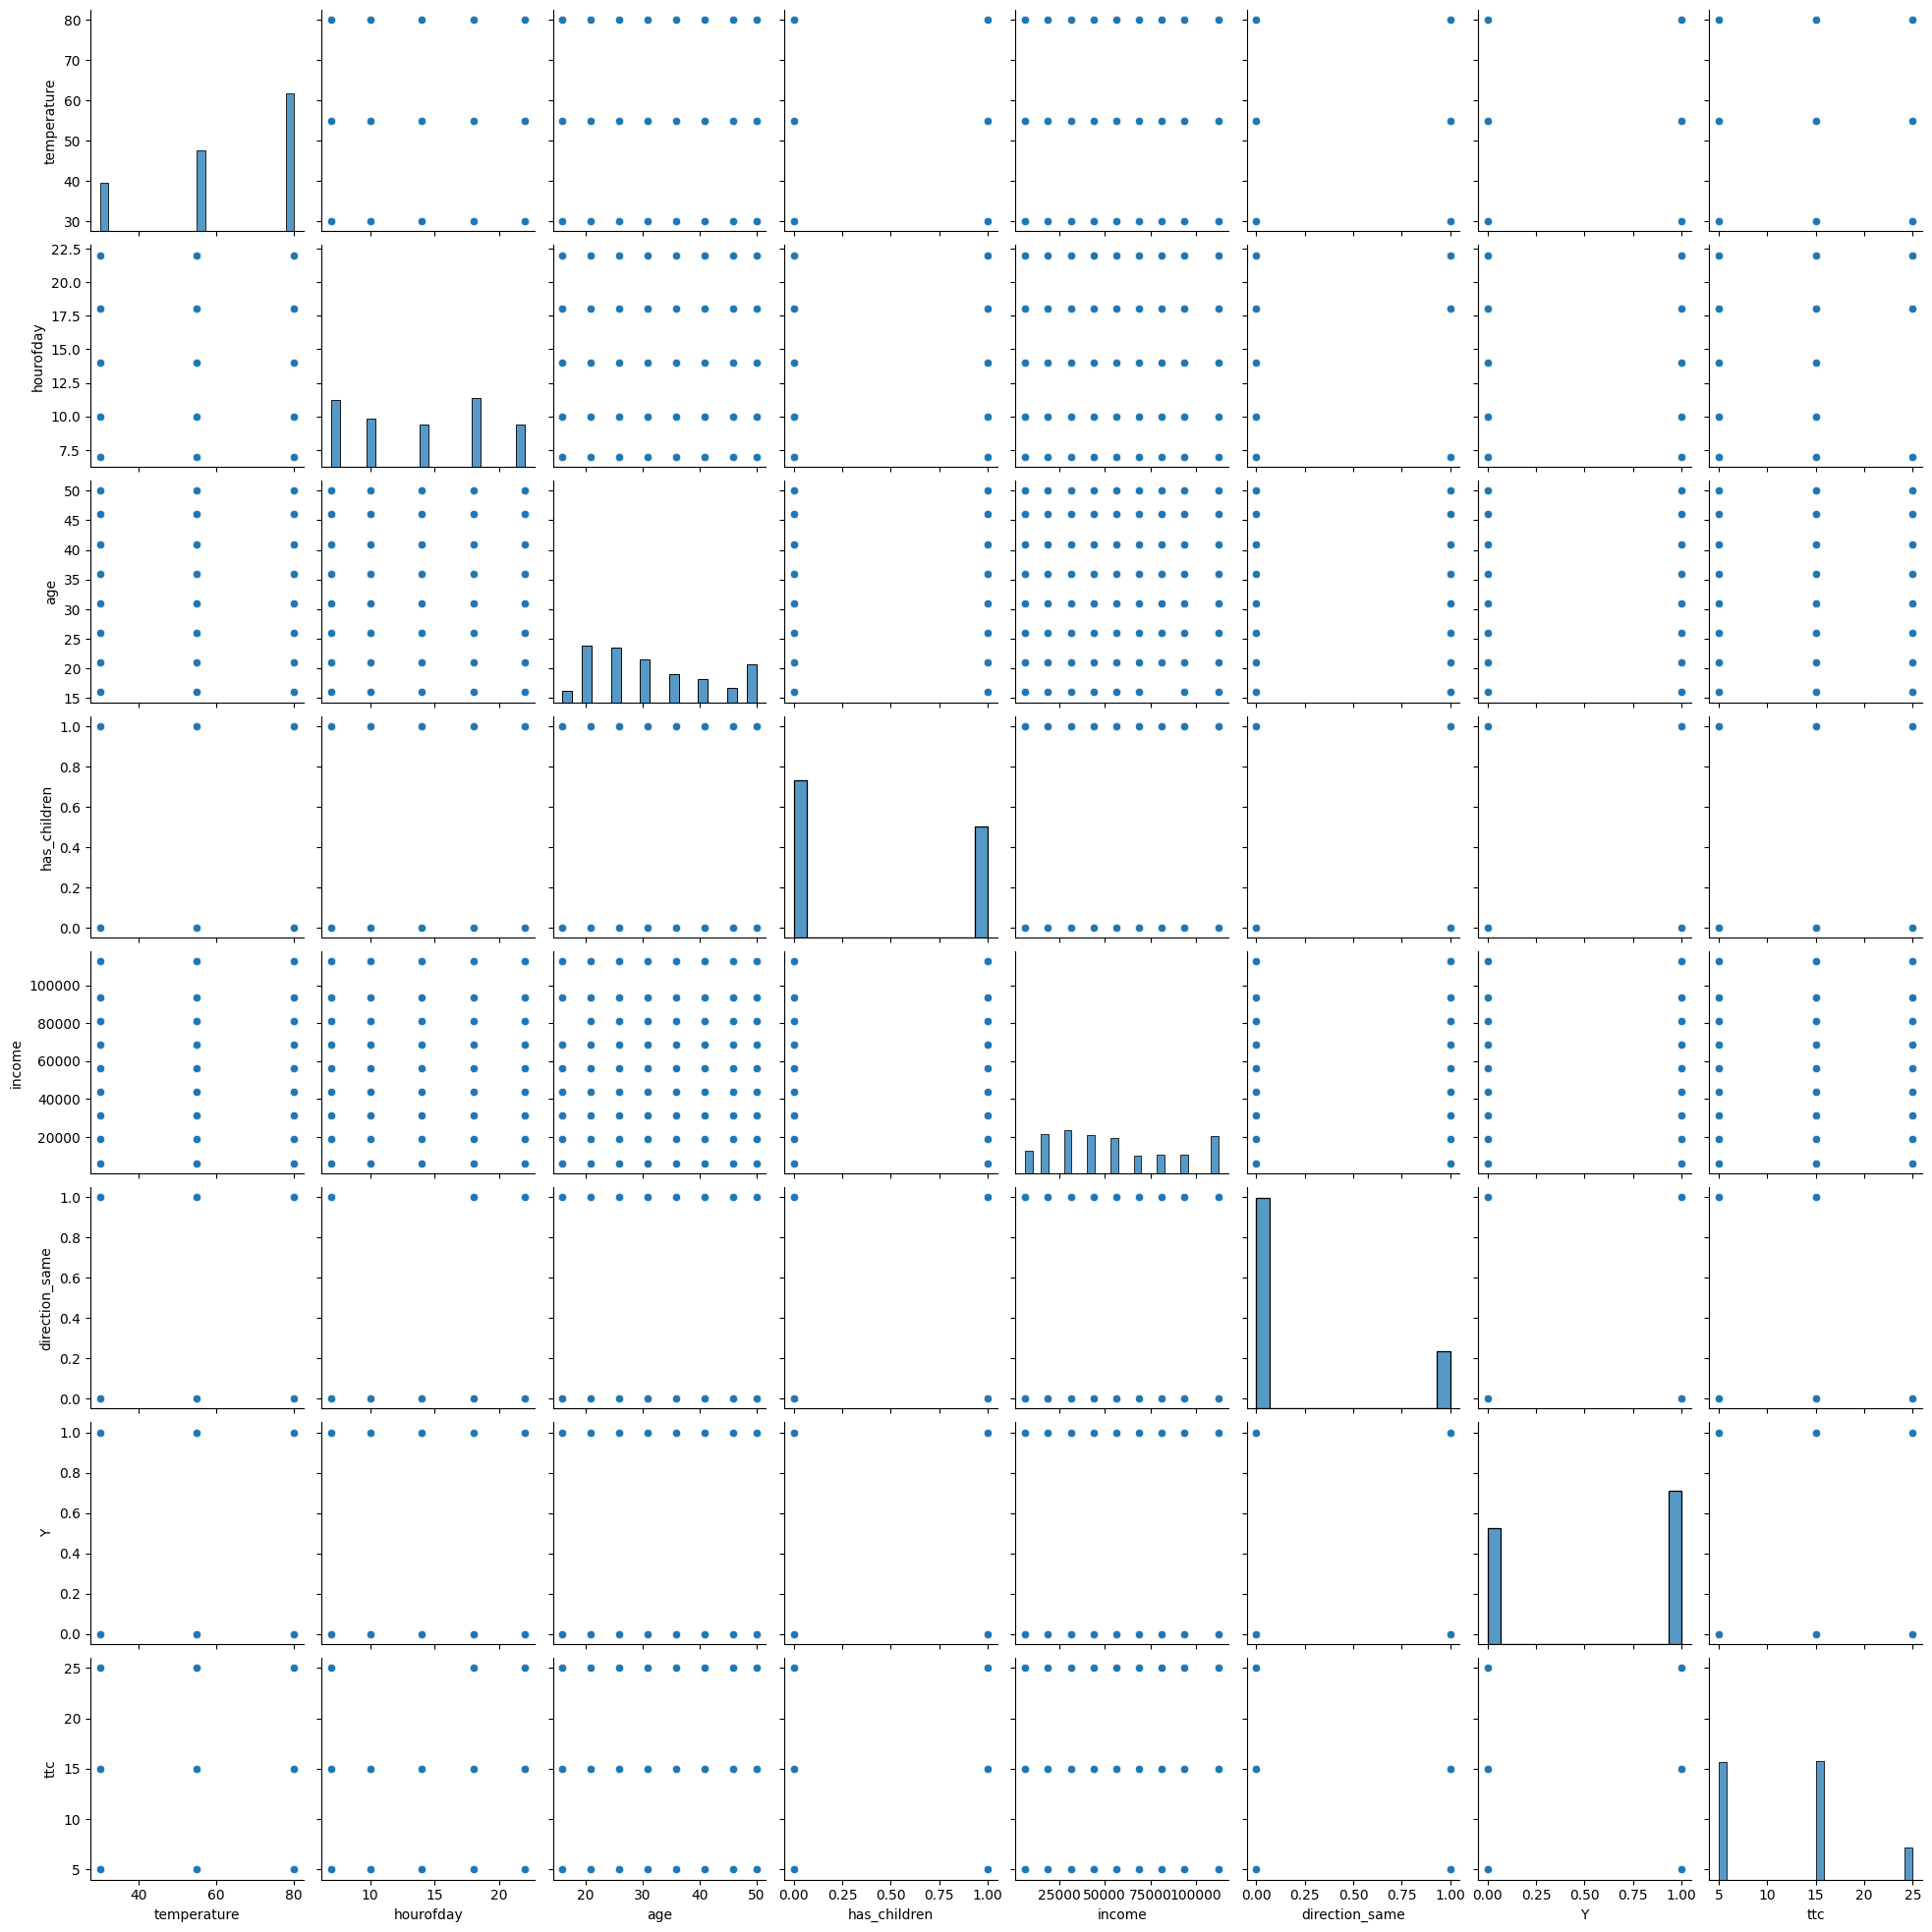

In [40]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data,hue='Y')

**Comment:** Integer variables seem well-distributed without significant outliers visible

#### Observations
There's a stronger tendency for people to accept a coupon if...
* The weather is warmer (`temperature` is higher)
* The time is between 10AM - 6PM (`hourofday` is between 10 - 18)
* Their age is 21-26 (`age` is between 21-26)
* They don't have children (`has_children` is 0)
* Your income is less than $62,500 or greater than $87,500 (`income !=
* The coupon is in the opposite direction of where they're going (`direction_same` is 0)
* The travel time to the business is 15 minutes or less (`ttc` <= 15)

### Problems

#### 4. What proportion of the total observations chose to accept the coupon?



In [ ]:
len(data.query('Y==1'))/len(data)

Follow-up: based on the pairplot of the entire dataset with `hue=='Y'` and resulting observations, is there a higher acceptance rate using those observations as filters?

In [ ]:
a='temperature=="80"'
b='(hourofday>=10 & hourofday<=18)'
c='(age==21 | age==26)'
d='has_children==0'
e='direction_same==0'
f='ttc<=15'

len(data.query(''+a+'&'+b+'&'+c+'&'+d+'&'+e+'&'+f+''))

Nope, because filtering the data to include all of these criteria, simultaneously, results in no data

#### 5. Use a bar plot to visualize the `coupon` column.

In [ ]:
px.histogram(data,x='coupon',color='Y')

#### 6. Use a histogram to visualize the temperature column.

In [ ]:
sns.displot(data['temperature'],kde=True,rug=True)

### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
barcoup=data.query('coupon=="Bar"')
barcoup.sample(10)

#### 2. What proportion of bar coupons were accepted?


In [ ]:
len(barcoup.query('Y==1'))/len(barcoup)

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
a='(Bar=="never" | Bar=="less1" | Bar=="1~3")'
lessbar=len(barcoup.query(''+a+'& Y==1'))/len(barcoup.query(''+a+''))
morebar=len(barcoup.query('~'+a+' & Y==1'))/len(barcoup.query('~'+a+''))
[lessbar,morebar,len(barcoup.query(''+a+''))+len(barcoup.query('~'+a+'')),len(barcoup)]

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


**Assumption:** The # of visits for different types of establishments are monthly numbers even though it's not explicitly stated in the Data Description

In [ ]:
b='(Bar=="1~3" | Bar=="4~8" | Bar=="gt8")'
c='(age!="below21" | age!="21")'
bar1mo25=len(barcoup.query(''+b+' & '+c+' & Y==1'))/len(barcoup.query(''+b+' & '+c+''))
notbar1mo25=len(barcoup.query('~('+b+' & '+c+') & Y==1'))/len(barcoup.query('~('+b+' & '+c+')'))
[bar1mo25,notbar1mo25]

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
d='(passenger=="Friend(s)" | passenger=="Partner")'
e='(occupation!="Farming Fishing & Forestry")'
bar1monokid=len(barcoup.query(''+b+'&'+d+'&'+e+'& Y==1'))/len(barcoup.query(''+b+'&'+d+'&'+e+''))
notbar1monokid=len(barcoup.query('~('+b+'&'+d+'&'+e+') & Y==1'))/len(barcoup.query('~('+b+'&'+d+'&'+e+')'))
[bar1monokid,notbar1monokid]

#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
f='maritalStatus!="Widowed"'
g='(age=="below21" | age=="21" | age=="26")'
h='((RestaurantLessThan20=="4~8" | RestaurantLessThan20=="gt8") & (income=="$12500 - $24999" | income=="Less than $12500" | income=="$25000 - $37499" | income=="$37500 - $49999"))'

i=len(barcoup.query(''+b+'&'+d+'&'+f+' & Y==1'))/len(barcoup.query(''+b+'&'+d+'&'+f+''))
#j=len(barcoup.query(''+b+'&'+g+' & Y==1'))/len(barcoup.query(''+b+'&'+g+''))
j=len(barcoup.query(''+b+'&'+g+''))
k=len(barcoup.query(''+h+''))/len(barcoup.query(''+h+''))
[i,j,k]

#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation: Coffee House

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

In [ ]:
sns.pairplot(data.query('coupon=="Coffee House"'),hue='CoffeeHouse')

In [ ]:
cof=data.query('coupon=="Coffee House"')
cof.sample(10)

In [ ]:
px.histogram(cof,x='passenger',color='Y')